## Nichtlineare Betonarbeitslinie nach EN 1992-1

#### 1. Spannungs-Dehnungs-Linie für nichtlineares Verfahren der Schnittgrößenermittlung und für Verformunsberechnung

Formel: $\frac{\sigma_c}{f_{cm}} = \frac{k\eta - \eta^2}{1 \  + \  (k - 2) \ \eta}$
<br>
***
__Dabei ist__
<br>
$\eta = \frac{\epsilon_c}{\epsilon_{c1}}$
<br>
<br>
$k = \frac{1,05 \  E_{cm} \  \times \  \lvert \epsilon_{c1} \rvert}{f_{cm}}$

In [1]:
import ipywidgets as widgets
from IPython.display import Javascript, display
from collections import namedtuple

w = widgets.Dropdown(
    options=['C20/25', 'C25/30', 'C30/37', 'C35/45', 'C40/50'],
    value='C20/25',
    description='',)

def on_button_clicked(btn):
    if w.value == 'C20/25':
        beton = namedtuple('beton', 'fck fcm fctm Ecm εc1 εcu1 εc2 n εc3 εcu3')
        C20 =  beton(fck=20, fcm=25, fctm=2.2, Ecm=30000, εc1=2.0, εcu1=3.5, εc2=2, n=2, εc3=1.75, εcu3=3.5)
        return C20
    if w.value == 'C25/30':
        beton = namedtuple('beton', 'fck fcm fctm Ecm εc1 εcu1 εc2 n εc3 εcu3')
        C25 =  beton(fck=25, fcm=33, fctm=2.6, Ecm=31000, εc1=2.1, εcu1=3.5, εc2=2, n=2, εc3=1.75, εcu3=3.5)
        return C25
    if w.value == 'C30/37':
        beton = namedtuple('beton', 'fck fcm fctm Ecm εc1 εcu1 εc2 n εc3 εcu3')
        C30 =  beton(fck=30, fcm=38, fctm=2.9, Ecm=33000, εc1=2.2, εcu1=3.5, εc2=2, n=2, εc3=1.75, εcu3=3.5)
        return C30
    if w.value == 'C35/45':
        beton = namedtuple('beton', 'fck fcm fctm Ecm εc1 εcu1 εc2 n εc3 εcu3')
        C35 =  beton(fck=35, fcm=43, fctm=3.2, Ecm=34000, εc1=2.25, εcu1=3.5, εc2=2, n=2, εc3=1.75, εcu3=3.5)
        return C35
    else:
        beton = namedtuple('beton', 'fck fcm fctm Ecm εc1 εcu1 εc2 n εc3 εcu3')
        C40 =  beton(fck=40, fcm=48, fctm=3.5, Ecm=35000, εc1=2.3, εcu1=3.5, εc2=2, n=2, εc3=1.75, εcu3=3.5)
        return C40

btn = widgets.Button(description="Betoneigenschaften")
btn.on_click(on_button_clicked)

display(w)
#display(btn)

In [7]:
beton = on_button_clicked(btn)
fck = beton.fck
fcm = beton.fcm
fctm = beton.fctm
Ecm = beton.Ecm
εc1 = beton.εc1
εcu1 = beton.εcu1
εc2 = beton.εc2
n = beton.n
εc3 = beton.εc3
εcu3 = beton.εcu3

print('Betoneigenschaften für', w.value)
print('fck =', fck)
print('fcm =', fcm)
print('fctm =', fctm)
print('Ecm =', Ecm)
print('εc1 =', εc1)
print('εcu1 =', εcu1)
print('εc2 =', εc2)
print('n =', n)
print('εc3 =', εc3)
print('εcu3 =', εcu3)

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

button = widgets.Button(description="Run below")
button.on_click(run_all)

display(button)

<IPython.core.display.Javascript object>

Betoneigenschaften für C25/30
fck = 25
fcm = 33
fctm = 2.6
Ecm = 31000
εc1 = 2.1
εcu1 = 3.5
εc2 = 2
n = 2
εc3 = 1.75
εcu3 = 3.5


In [8]:
import numpy as np
import pandas as pd
import itable
εc = np.arange(0,0.0036,0.0001)
η = εc / εc1 * 1000
k = 1.05 * Ecm * np.abs(εc1) / fcm / 1000
σc = fcm * 1000 * (k * η - η**2) / (1 + (k - 2) * η)
d = {'εc': εc, 'σc':σc}
df = pd.DataFrame(data=d)
df.loc[36] = [0.0037, 0.0]
itable.PrettyTable(df, tstyle=itable.TableStyle(theme="theme1"), center=False)
# itable.PrettyTable(df[['σc']], tstyle=itable.TableStyle(theme="theme1"), center=False)
# Zum Ausdrucken die Epsilon-Werte -> σc mit εc austauschen

εc,σc
0.0,0.0
0.0001,3169.39959753
0.0002,6168.75410783
0.0003,8999.7796123
0.0004,11664.1691784
0.0005,14163.593244
0.0006,16499.6999945
0.0007,18674.1157318
0.0008,20688.4452365
0.0009,22544.2721226


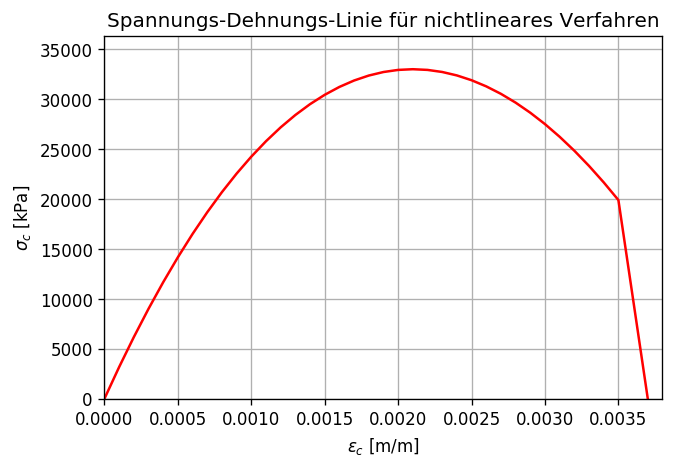

In [9]:
import matplotlib.pyplot as plt

plt.figure(dpi=120)
plt.plot(df['εc'], df['σc'],  'r-', linewidth=1.5, label="$\epsilon_c$")
plt.xlabel('$\epsilon_c$ [m/m]', fontsize=10)
plt.ylabel('$\sigma_c$ [kPa]', fontsize=10)
plt.title('Spannungs-Dehnungs-Linie für nichtlineares Verfahren', fontsize=12)

ax = plt.gca()  # gives the rights to change the axis properties
ax.grid(True)  # grid on
ax.set_xlim(0.0, 0.0038)
ax.set_ylim(0.0, (max(σc)*1.1))
box = ax.get_position()
plt.show()

#### 2. Spannungs-Dehnungs-Linie für die Querschnittbemessung

Formel: $ \sigma_c = f_{cd} \cdot \lbrack 1 - ( 1 - \frac {\epsilon_c}{\epsilon_{c2}})^n \rbrack $
<br>
<br>
$ \sigma_c = f_{cd} $ für $ \epsilon_{c2} \leqslant \epsilon_c \leqslant \epsilon_{cu2} $
<br>
***
__Dabei ist__
<br>
$ n $ der Exponent nach Tabelle 3.1 der Norm EN-1992-1
<br>
$ \epsilon_{c2} $ &nbsp;&nbsp;die Dehnung beim Erreichen der Festigkeitsgrenze nach Tabelle 3.1
<br>
$ \epsilon_{cu2} $ die maximal Dehnung nach Tablle 3.1

In [10]:
γM = 1.5
γE = 1.35
εcu2 = εcu3
εc_ = np.arange(0, εc2/1000, 0.0001)
εc__ = np.arange(εc2/1000, εcu2/1000 + 0.0001, 0.0001)
σc_ = fck * 1000 * (1 - (1 - εc_ / εc2 * 1000)**n) / (γM * γE)
σc__ = fck * 1000 / (γM * γE)
d1 = {'εc': εc_, 'σc':σc_}
d2 = {'εc': εc__, 'σc':σc__}
df1 = pd.DataFrame(data=d1)
df2 = pd.DataFrame(data=d2)
frames = [df1, df2]
df = pd.concat(frames)
df.loc[36] = [0.0036, 0.0]
itable.PrettyTable(df, tstyle=itable.TableStyle(theme="theme1"), center=False)

εc,σc
0.0,0.0
0.0001,1203.7037037
0.0002,2345.67901235
0.0003,3425.92592593
0.0004,4444.44444444
0.0005,5401.2345679
0.0006,6296.2962963
0.0007,7129.62962963
0.0008,7901.2345679
0.0009,8611.11111111


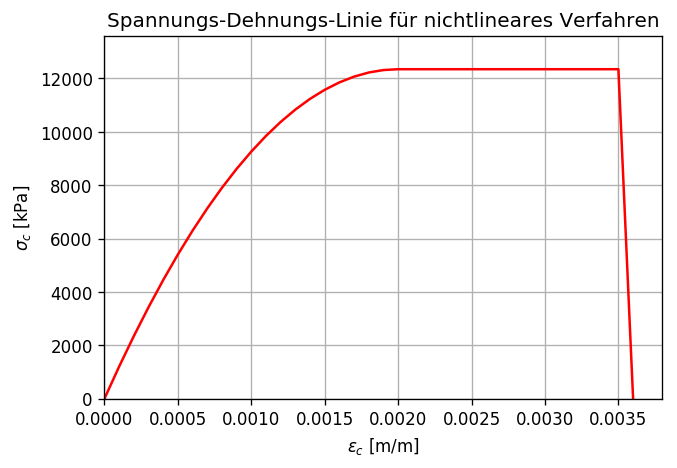

In [11]:
plt.figure(dpi=120)
plt.plot(df['εc'], df['σc'], 'r-', linewidth=1.5, label="$\epsilon_c$")
plt.xlabel('$\epsilon_c$ [m/m]', fontsize=10)
plt.ylabel('$\sigma_c$ [kPa]', fontsize=10)
plt.title('Spannungs-Dehnungs-Linie für nichtlineares Verfahren', fontsize=12)

ax = plt.gca()  # gives the rights to change the axis properties
ax.grid(True)  # grid on
ax.set_xlim(0.0, 0.0038)
ax.set_ylim(0.0, (max(df['σc'])*1.1))
box = ax.get_position()
plt.show()